### Importing and building the plotting functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')
# plt.style.use('seaborn')

In [3]:
def plotter(DF, name, xlabel= 'Date', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8# if col in Countries else 0.4
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel(xlabel)
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [4]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
#     plt.ylim(bottom=0.05, top=2*10**4)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [5]:
def stackplotter(DF, name, tail=None):
    plt.figure(figsize = (14, 7))
    
    if tail:
        DF = DF.tail(tail)
    columns = Countries[::-1]
    columns = [t for t in columns if 'World' not in t][::-1]
    
    plt.stackplot(DF.index, 
                  DF[['World']].T, 
                  labels=['World'], 
                  colors=['blue'], 
                  alpha=0.2,                 
                 )
    
    plt.stackplot(DF.index, 
                  DF[columns].T, 
                  labels=columns, 
                  colors=[colors[c] for c in columns], 
                  alpha=0.8,                 
                 )
    
    
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

### Importing the Data from Johns Hopkins data

In [6]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DF = pd.read_csv(data_url)

In [7]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Deaths = DF.copy()

In [8]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DF = pd.read_csv(data_url)

In [9]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Confirmed = DF.copy()

In [10]:
colors = {'India': 'Blue', 
          'World': 'Blue', 
          'US': 'Black', 
          'Brazil': 'darkgreen', 
          'Mexico': 'Orange', 
#           'India': 'Blue', 
          'UK': 'Purple', 
          'Italy': 'grey', 
          'Russia': 'cyan', 
          'France': 'violet', 
          'Germany': 'lime', 
#           'Spain': 'yellow',
#           'Colombia': 'lightgreen', 
#           'Argentina': 'Teal',
#           'Iran': 'brown', 
          'China': 'red', 
#           'New Zealand': 'lightblue'
         }

Countries = list(colors.keys())

### Deaths

In [11]:
Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,China
2021-05-19,287122,3417682,587874,441691,220850,127956,124646,115003,108342,86908,4846
2021-05-20,291331,3430512,588539,444094,221080,127963,124810,115393,108343,87135,4846
2021-05-21,295525,3443191,589223,446309,221256,127972,125028,115764,108343,87303,4846
2021-05-22,299266,3454000,589703,448208,221597,127978,125153,116144,108345,87385,4846
2021-05-23,303720,3463813,589893,449068,221647,127983,125225,116497,108358,87429,4846


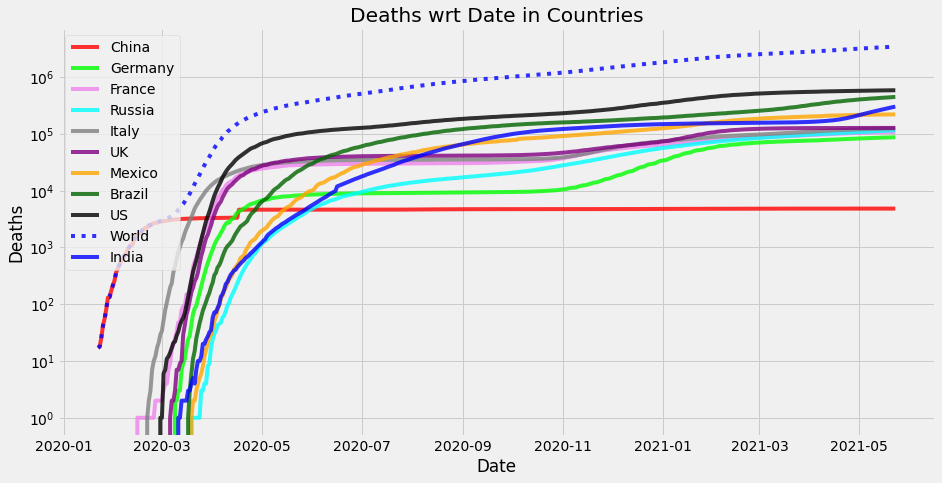

In [12]:
plotter(Deaths, 'Deaths')

### Confirmed Cases

In [13]:
Daily_Confirmed = np.round((Confirmed - Confirmed.shift(1))/1)
Daily_Confirmed = Daily_Confirmed.fillna(0).astype('int')
Daily_Confirmed[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,China
2021-05-19,276110,671092,29293,79219,2000,2146,5500,7799,19057,11881,13
2021-05-20,259551,634275,30141,82039,2628,2699,5736,9112,449,10727,25
2021-05-21,257299,612892,28341,76855,2604,2708,5215,8811,270,8096,11
2021-05-22,240842,549074,19778,76490,2586,2524,4714,8585,228,6419,20
2021-05-23,222315,478141,12853,35819,1274,2093,3993,8827,728,4643,20


In [14]:
Confirmed_EWM = np.round(Daily_Confirmed.ewm(com=14).mean().astype(int))
Confirmed_EWM[Countries].tail()

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,China
2021-05-19,311853,707068,40801,62375,2603,2066,9173,8430,19336,12944,18
2021-05-20,308366,702215,40090,63685,2605,2109,8944,8476,18077,12796,18
2021-05-21,304962,696261,39307,64563,2605,2148,8696,8498,16890,12483,18
2021-05-22,300687,686448,38005,65358,2604,2173,8430,8504,15779,12078,18
2021-05-23,295462,672561,36328,63389,2515,2168,8134,8525,14776,11583,18


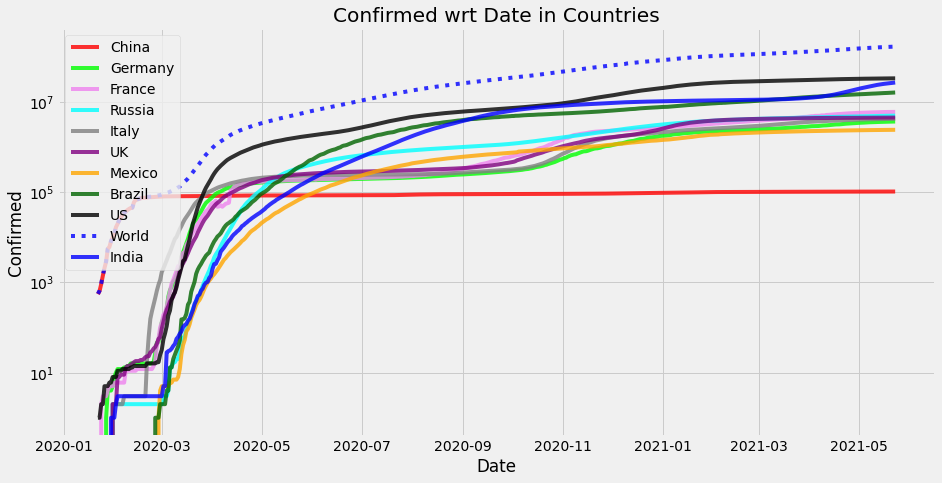

In [15]:
plotter(Confirmed, 'Confirmed')

### Daily Deaths

In [16]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,China
2021-05-19,3874,13344,655,2641,104,3,149,384,141,237,0
2021-05-20,4209,12830,665,2403,230,7,164,390,1,227,0
2021-05-21,4194,12679,684,2215,176,9,218,371,0,168,0
2021-05-22,3741,10809,480,1899,341,6,125,380,2,82,0
2021-05-23,4454,9813,190,860,50,5,72,353,13,44,0


### Exponential Weighted Mean

In [17]:
EWM = np.round(Daily_Deaths.ewm(com=7).mean(), 2)
name = 'Exponential Weighted Mean Weekly'

Weekly_Avg = np.round((Deaths - Deaths.shift(7))/7, 2)
# name = 'Weekly Average Deaths'

AVG = EWM 
# AVG = Weekly_Avg
AVG[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,China
2021-05-19,3955.74,12547.69,602.04,2030.66,203.23,9.45,192.30,360.25,186.67,204.64,0.01
2021-05-20,3987.39,12582.98,609.91,2077.20,206.58,9.15,188.77,363.97,163.46,207.44,0.01
2021-05-21,4013.22,12594.98,619.17,2094.43,202.76,9.13,192.42,364.85,143.03,202.51,0.01
2021-05-22,3979.19,12371.73,601.77,2070.00,220.04,8.74,183.99,366.74,125.40,187.45,0.01
2021-05-23,4038.54,12051.89,550.30,1918.75,198.78,8.27,169.99,365.03,111.35,169.51,0.01


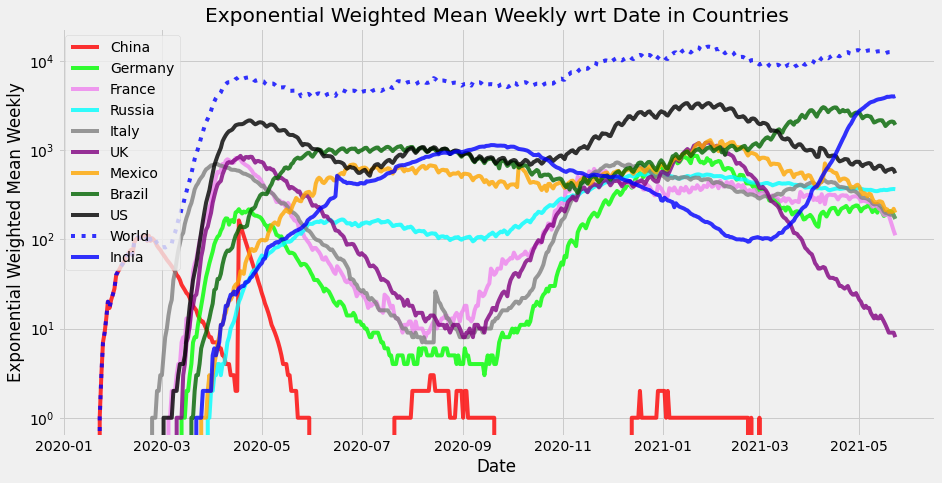

In [18]:
plotter(np.round(AVG), name)

### Stack Plots

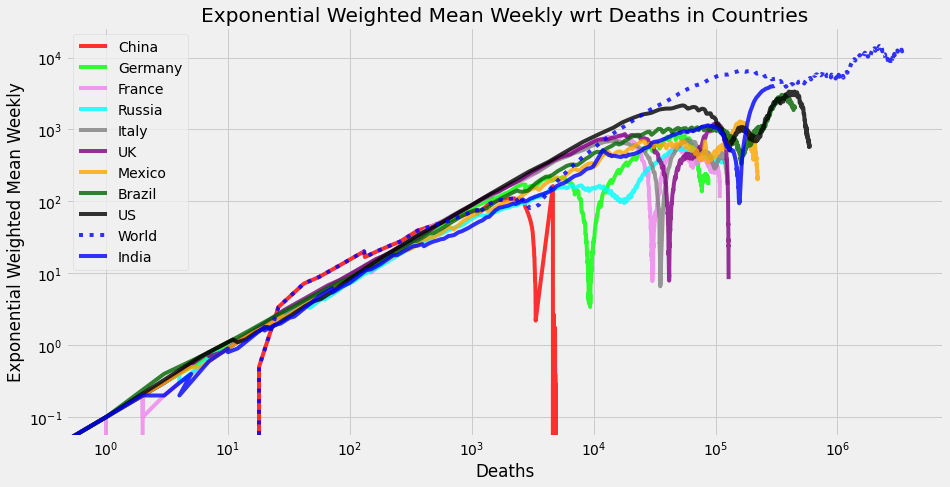

In [19]:
plotwrtDeaths(np.round(AVG, 1), name, Deaths)

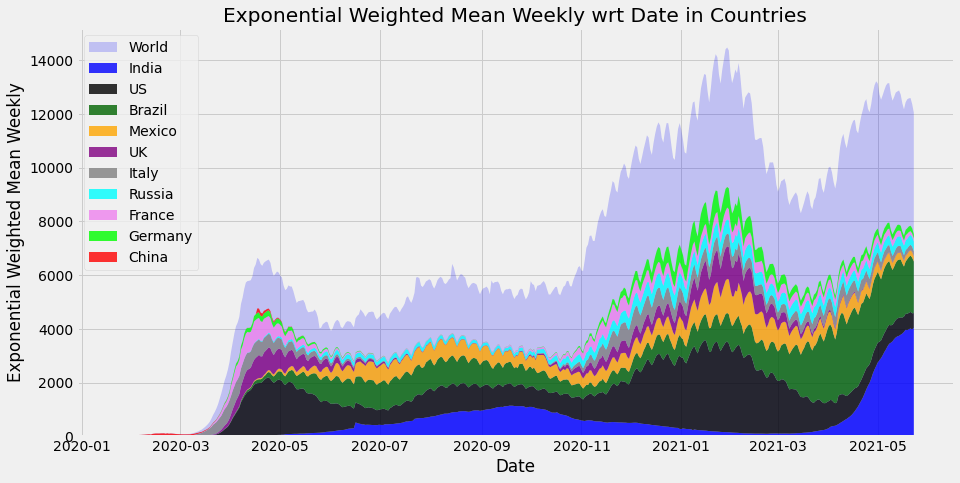

In [20]:
stackplotter(AVG, name)

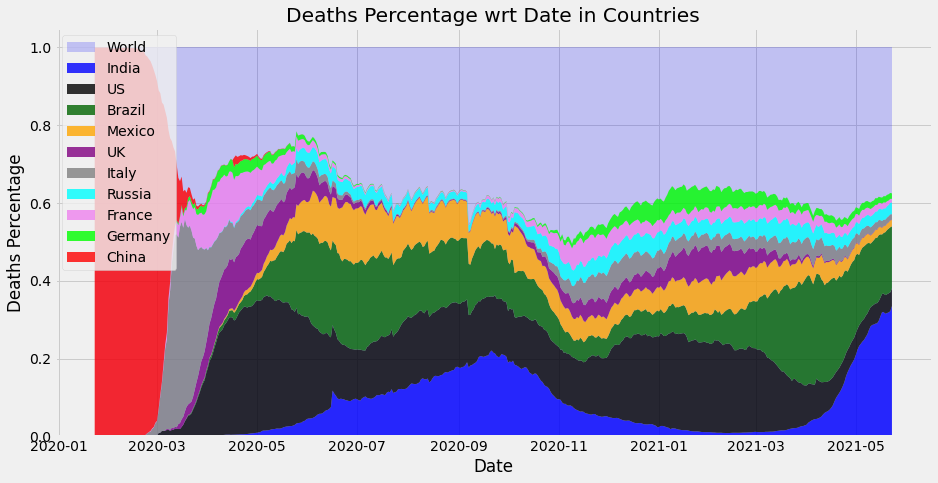

In [21]:
stackplotter(AVG.divide(AVG.World, axis=0), 'Deaths Percentage')

### Reproductivity

In [22]:
Reproductivity = np.round(EWM/EWM.shift(14), 4).clip(lower= 0.1)
Reproductivity[EWM.shift(14) < 12] = 1

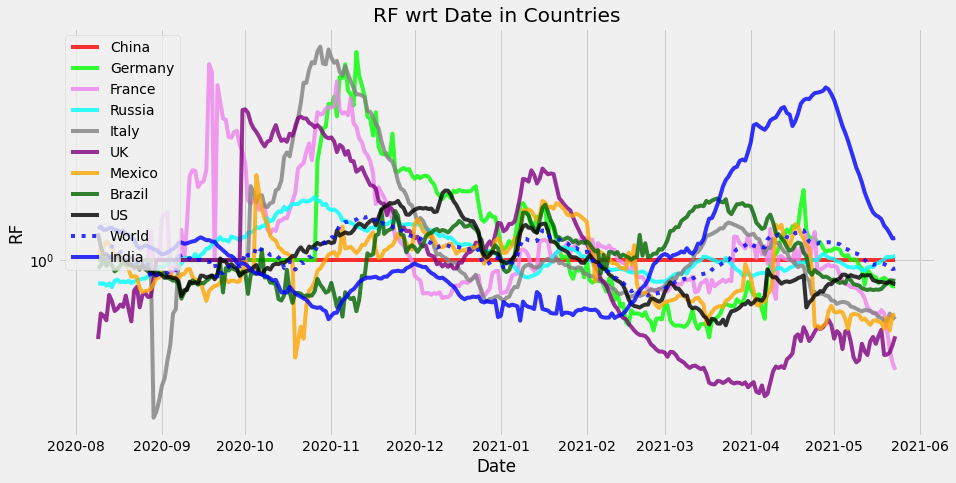

In [23]:
plotter(Reproductivity[200:], 'RF')

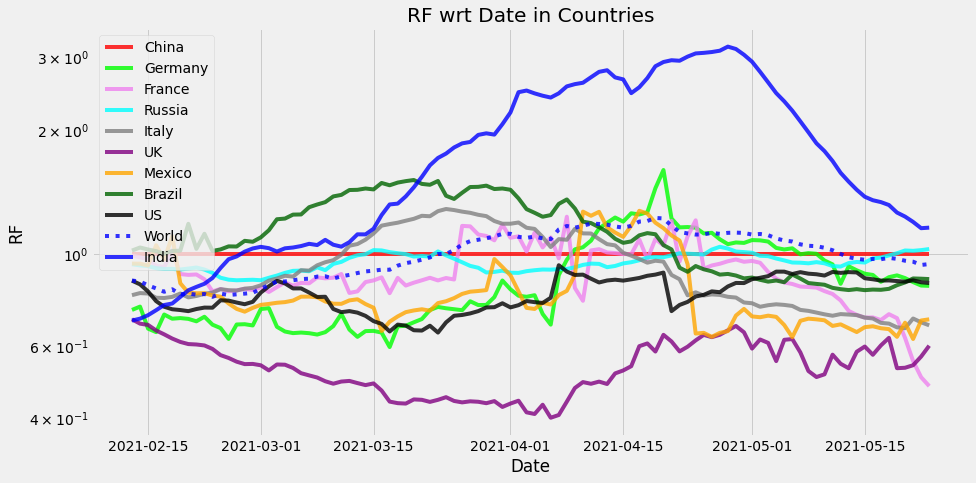

In [24]:
plotter(Reproductivity.tail(100), 'RF')

### Test rate

In [25]:
# We take the mortality to be 0.5%

mortality = 0.005

Testrate = np.round(Confirmed_EWM/(EWM/mortality), 3)
Testrate[EWM < 12] = None

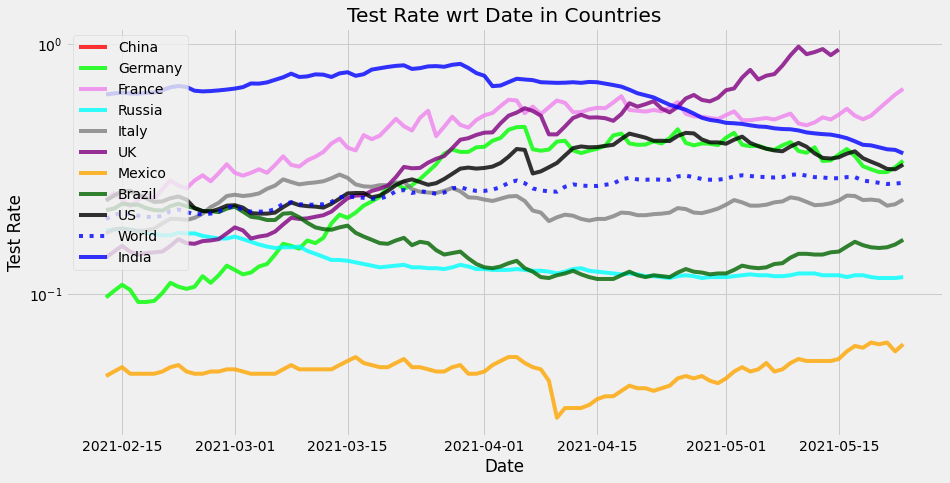

In [26]:
plotter(Testrate.tail(100), 'Test Rate', scale= 'log')

### Time Adjusted for starting day

In [27]:
def adjust_days(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [None for _ in range(len(X[col]) - len(L))]
    return X.reset_index()[DF.columns]
xlabel= 'Days from 5 Deaths'

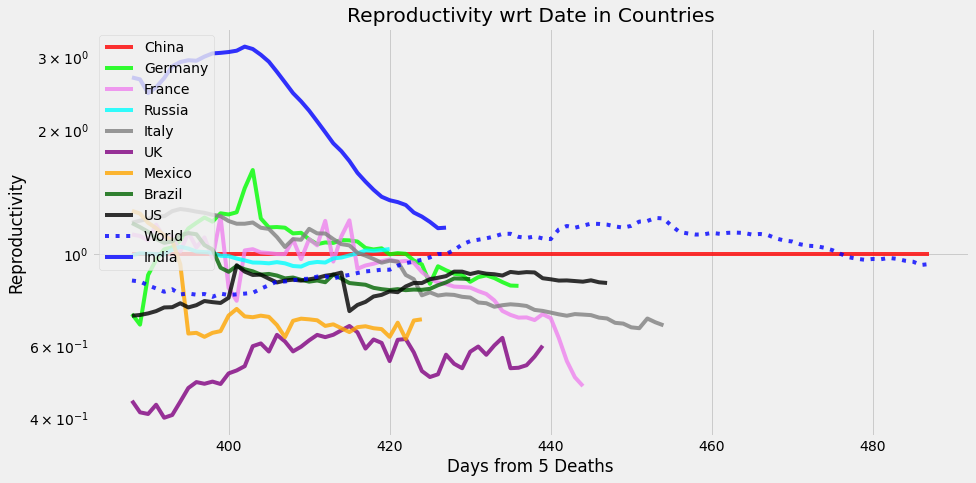

In [28]:
RF_A = adjust_days(Reproductivity)
plotter(RF_A.tail(100), 'Reproductivity', xlabel)

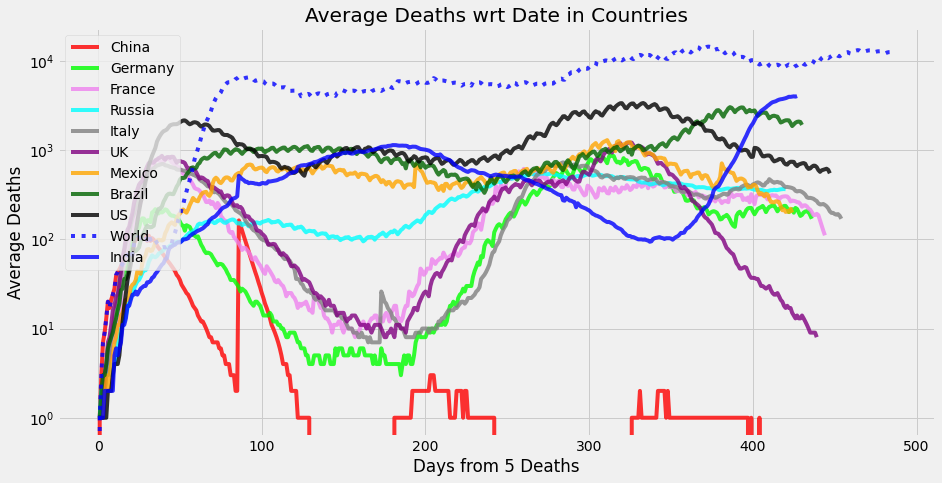

In [29]:
AVG_A = adjust_days(AVG)
plotter(np.round(AVG_A), 'Average Deaths', xlabel)

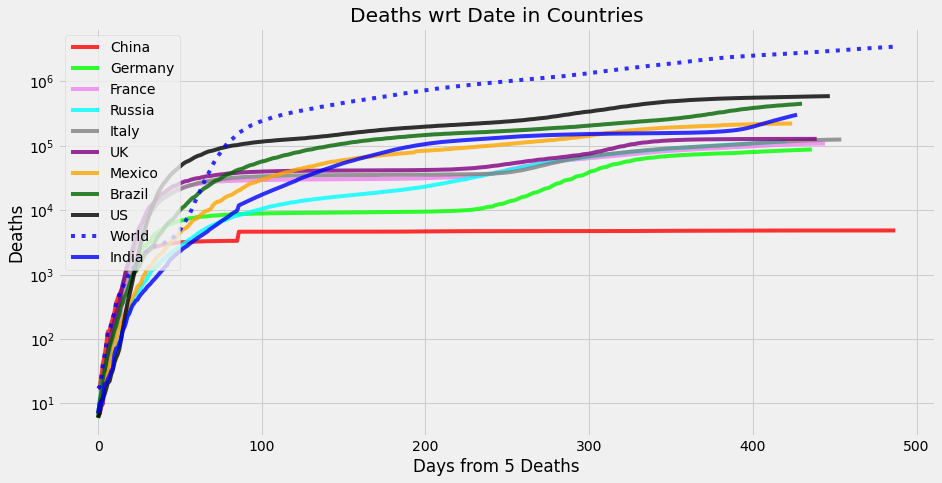

In [30]:
Deaths_A = adjust_days(Deaths)
plotter(Deaths_A, 'Deaths', xlabel)

### Today's Statistics by combining the previous tables

In [31]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

D = {
    'Deaths':Deaths,
    'Daily_Deaths':Daily_Deaths,
    'Weekly_Deaths': Weekly_Avg,
    'EWM7': EWM,
    'Reproductivity':Reproductivity,
    'Confirmed': Confirmed, 
    'Testrate': Testrate,
    'Confirmed_EWM': Confirmed_EWM
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
LastDay_DF['Estimated(M)'] = np.round((LastDay_DF.Deaths/mortality)/1000000, 2)

In [32]:
LastDay_DF.sort_values('Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,3463813,9813,12052.00,12051.89,0.9459,167177284,0.279,672561,692.76
US,589893,190,546.14,550.30,0.8512,33117737,0.330,36328,117.98
Brazil,449068,860,1902.43,1918.75,0.8699,16083258,0.165,63389,89.81
India,303720,4454,4190.00,4038.54,1.1587,26752447,0.366,295462,60.74
Mexico,221647,50,172.86,198.78,0.6952,2396604,0.063,2515,44.33
UK,127983,5,6.00,8.27,0.6001,4478390,NaN,2168,25.60
Italy,125225,72,152.71,169.99,0.6723,4192183,0.239,8134,25.04
Russia,116497,353,367.14,365.03,1.0284,4944129,0.117,8525,23.30
France,108358,13,83.00,111.35,0.4792,5980325,0.663,14776,21.67


In [33]:
LastDay_DF.sort_values('Weekly_Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,3463813,9813,12052.00,12051.89,0.9459,167177284,0.279,672561,692.76
India,303720,4454,4190.00,4038.54,1.1587,26752447,0.366,295462,60.74
Brazil,449068,860,1902.43,1918.75,0.8699,16083258,0.165,63389,89.81
US,589893,190,546.14,550.30,0.8512,33117737,0.330,36328,117.98
Argentina,74063,375,505.86,457.28,1.2160,3539484,0.279,25520,14.81
Colombia,84724,496,489.14,486.52,1.0724,3232456,0.166,16201,16.94
Russia,116497,353,367.14,365.03,1.0284,4944129,0.117,8525,23.30
Peru,68053,246,261.86,298.63,0.9146,1925289,0.103,6170,13.61
Iran,78597,216,237.29,261.07,0.7254,2832518,0.277,14484,15.72


### Pie Chart

In [34]:
def piechart(name='Deaths', size=12, DF=LastDay_DF):
    plt.figure(figsize = (size, size))
    DF = DF.sort_values(name, ascending = False)
    
    countries = DF.index[1:]
    deaths = DF[name][1:].clip(0, None)
    
    print ('World total: ',int( DF.loc['World'][name]))
    
    plt.pie(deaths, 
            labels= [c +' '+ str(d) for c, d in zip(countries, deaths)], 
            startangle=90,
            counterclock=False,
            autopct='%1.f%%', 
#             pctdistance=0.8
           )
    
    plt.title(name+' piechart for every country')

World total:  3463813


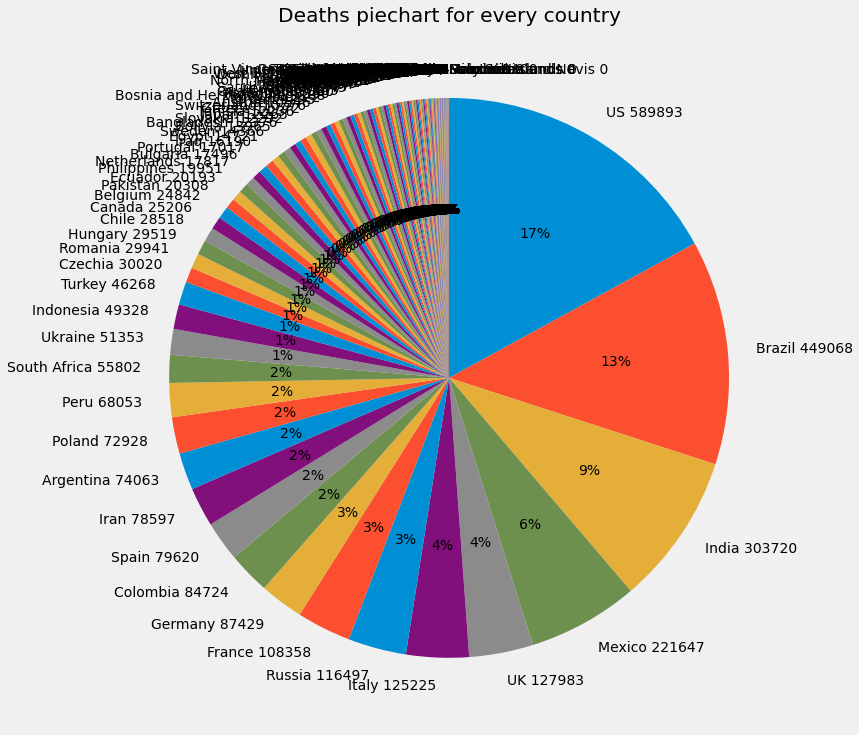

In [35]:
piechart('Deaths')

World total:  12052


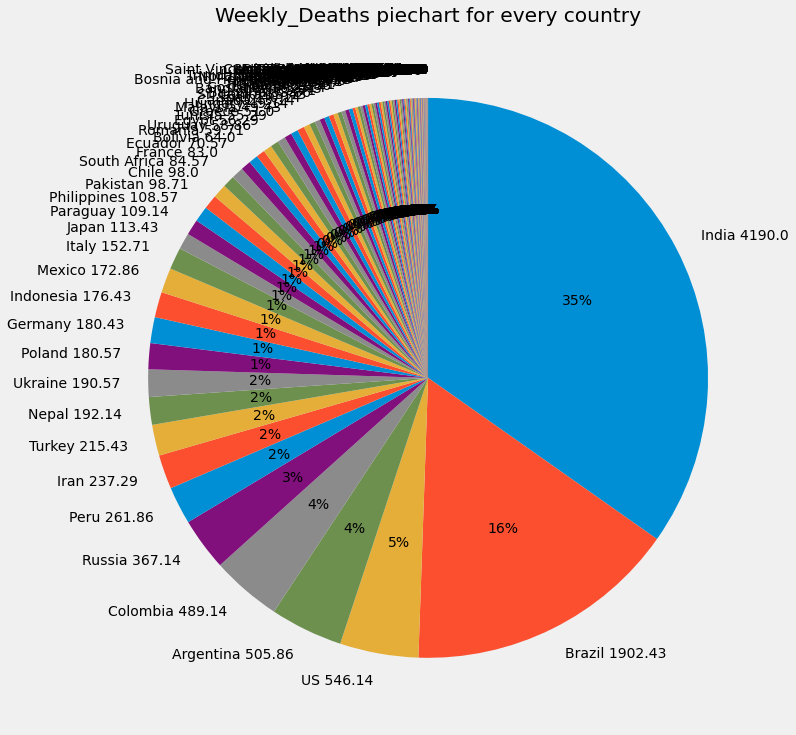

In [36]:
piechart('Weekly_Deaths')

World total:  9813


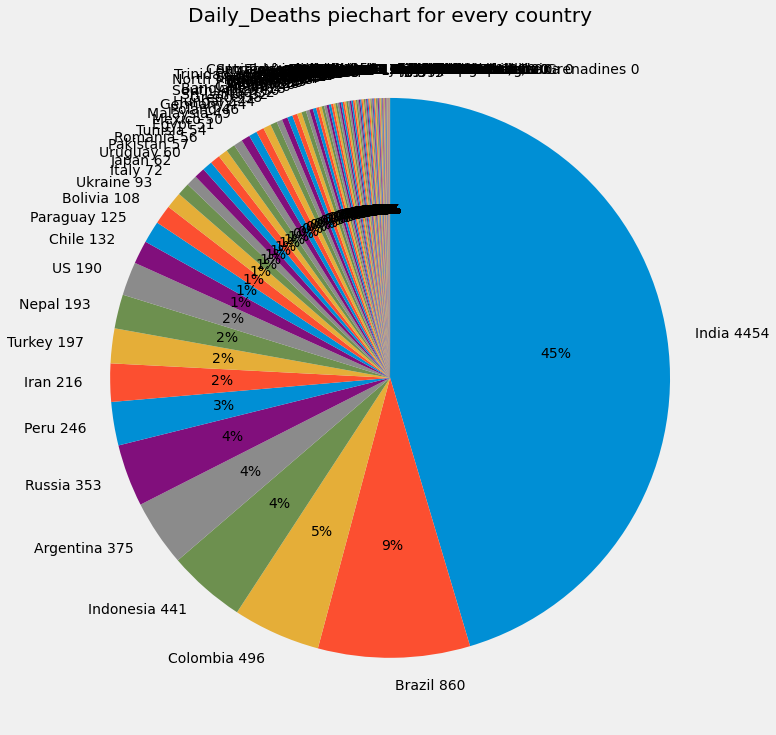

In [37]:
piechart('Daily_Deaths')

In [38]:
print('Today\'s Date: ', dt.datetime.now().date())

Today's Date:  2021-05-24


In [39]:
# Total estimated Cases: 
LastDay_DF.loc['World'].Deaths/mortality

692762600.0

<p>Per Capita deaths are included in this  <a href="https://www.statista.com/statistics/1104709/coronavirus-deaths-worldwide-per-million-inhabitants/" rel="nofollow">Statista</a></p>

In [40]:
!git add .
!git commit -m "`date` update"
!git push origin master

The file will have its original line endings in your working directory


[master 9624ecd] `date` update
 1 file changed, 1999 insertions(+), 1999 deletions(-)
 rewrite Simplified Death Statistics SARS-COV2.ipynb (71%)


To https://github.com/Arrowheadahp/COVID-19.git
   0599577..9624ecd  master -> master
